<a href="https://colab.research.google.com/github/Andriansyah2501/SistemRekomendasi/blob/main/Proyek_Akhir_Sistem_Rekomendasi_Makanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Makanan - Andrian Syah

## Project Overview

Di tengah pesatnya perkembangan industri kuliner, baik dalam bentuk restoran fisik maupun layanan pemesanan makanan secara daring, pelanggan kini dihadapkan pada begitu banyak pilihan menu yang tersedia. Kondisi ini seringkali membuat mereka kebingungan dalam menentukan makanan yang ingin dipesan, bahkan berisiko membuat keputusan yang kurang memuaskan karena tidak sesuai dengan selera pribadi. Fenomena ini membuka peluang untuk menghadirkan solusi teknologi berupa sistem rekomendasi makanan yang mampu memberikan saran menu secara personal dan relevan.

Sistem rekomendasi makanan dirancang untuk menyederhanakan proses pengambilan keputusan pelanggan dengan memberikan usulan menu yang disesuaikan dengan riwayat konsumsi, penilaian yang pernah diberikan, maupun preferensi yang dinyatakan secara langsung. Melalui penerapan teknik-teknik seperti machine learning, analitik data, serta pemrosesan bahasa alami, sistem ini dapat terus belajar dan menyempurnakan akurasinya seiring waktu.

Bukan hanya memberikan manfaat bagi konsumen, teknologi ini juga berpotensi besar dalam membantu pelaku usaha kuliner untuk meningkatkan konversi penjualan. Dengan menampilkan menu yang lebih relevan bagi tiap individu, peluang untuk meningkatkan kepuasan, loyalitas pelanggan, dan daya saing bisnis pun menjadi lebih besar di tengah pasar yang semakin kompetitif.

## Business Understanding

**Problem Statements**

Berdasarkan situasi yang telah dijelaskan sebelumnya, perusahaan berencana untuk mengembangkan sebuah sistem rekomendasi makanan yang mampu memberikan saran secara terpersonalisasi kepada pelanggan, guna menjawab tantangan berikut:

1. Bagaimana membangun sistem rekomendasi makanan yang sesuai dengan preferensi masing-masing pelanggan menggunakan pendekatan content-based filtering berdasarkan data yang tersedia?

2. Dengan memanfaatkan data rating pelanggan, bagaimana restoran dapat menyarankan menu lain yang memiliki kemiripan dan kemungkinan besar disukai, meskipun belum pernah dipesan oleh pelanggan sebelumnya?



**Goals**

Untuk menjawab pertanyaan tersebut, buatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:

- Menghasilkan sejumlah rekomendasi makanan yang dipersonalisasi untuk pelanggan dengan teknik content-based filtering.
- Menghasilkan sejumlah rekomendasi makanan yang sesuai dengan preferensi pelanggan dan belum pernah dikunjungi sebelumnya dengan teknik collaborative filtering.

**Solution Statement**

Untuk mencapai tujuan tersebut, langkah-langkah berikut akan diambil:
Untuk mencapai tujuan pengembangan sistem rekomendasi makanan yang efektif dan personal, beberapa tahapan berikut akan dilakukan:

1. **Pemahaman Data (Data Understanding):**
Tahap awal ini bertujuan untuk mengenali struktur dan karakteristik data yang tersedia. Dalam kasus ini, terdapat dua file utama yang digunakan: satu berisi informasi detail mengenai deskripsi makanan, dan satu lagi memuat data rating dari pelanggan.

2. **Analisis Eksplorasi Univariat (Univariate Exploratory Data Analysis):**
Pada tahap ini, dilakukan analisis terhadap masing-masing variabel dalam dataset secara individual. Jika diperlukan, juga dapat dilakukan eksplorasi hubungan antar variabel untuk memahami lebih dalam pola yang mungkin muncul dalam data.

3. **Persiapan Data (Data Preparation):**
Data kemudian dipersiapkan agar siap digunakan untuk pemodelan. Proses ini mencakup penanganan nilai yang hilang (missing values), penghapusan data duplikat, serta pembersihan data yang tidak konsisten atau tidak relevan.

4. **Pengembangan Model Content-Based Filtering:**
Pada tahap ini, sistem rekomendasi dibangun dengan pendekatan content-based filtering. Model ini bekerja dengan menganalisis kemiripan antar item (makanan) berdasarkan fitur deskriptifnya. Untuk merepresentasikan fitur, digunakan metode Count Vectorizer untuk menghitung frekuensi kata pada deskripsi makanan, dan kemudian dihitung tingkat kesamaannya menggunakan cosine similarity. Rekomendasi diberikan berdasarkan makanan lain yang memiliki kesamaan tinggi dengan makanan yang disukai pengguna.

5. **Pengembangan Model Collaborative Filtering:**
Pada tahap ini, digunakan pendekatan berbasis kolaborasi, di mana sistem menyarankan makanan berdasarkan pola rating pengguna. Dengan memanfaatkan riwayat rating yang telah diberikan, model akan mengidentifikasi makanan serupa yang belum pernah dicoba oleh pengguna namun kemungkinan besar sesuai dengan preferensinya.

## Data Understanding

Data yang digunakan pada proyek kali ini adalah "Sistem Rekomendasi Makanan" yang diunduh dari <a href="https://www.kaggle.com/datasets/schemersays/food-recommendation-system">Kaggle API</a>.

## Data Loading

### Upload Datasets from Kaggle API

In [1]:
!pip install kaggle -q

In [8]:
from google.colab import files
files.upload()

Saving 1662574418893344.csv to 1662574418893344.csv


{'1662574418893344.csv': b'Food_ID,Name,C_Type,Veg_Non,Describe\r\n1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rind, red chillies, garlic cloves (crushed), olive oil, summer squash (zucchini), sea salt, black pepper, basil leaves"\r\n2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), onion, salt, black pepper, carrot, cabbage, green onions, sweet chilli sauce, peanut butter, ginger, soy sauce, fresh cilantro, red pepper flakes (crushed), tarts"\r\n3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, sugar (fine grain), red chilli powder"\r\n4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic cloves (minced), chilli pepper (sliced), green papaya, carrot (peeled), cucumbers, mint leaves, toasted peanuts"\r\n5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest, lemon zest, jaggery syrup, almond flour, apple, butter (softened), eggs"\r

### Import Library and Datasets

In [12]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
foods = pd.read_csv('1662574418893344.csv')
ratings = pd.read_csv('ratings.csv')

print(f"shape of foods: {foods.shape}")
print(f"shape of ratings: {ratings.shape}")

shape of foods: (400, 5)
shape of ratings: (512, 3)


## Univariate Exploratory Data Analysis

**Foods Datasets**

In [15]:
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe
291,292,chicken tikka,Indian,non-veg,served on a skewer
180,181,vegetable biryani,Indian,veg,"Cumin, Onion, Ginger Garlic, Mix Vegetable, Co..."
391,392,Rajas Poblanas,Mexican,veg,"poblano pepper, cream, salt, cream cheese"
292,293,chicken tikka masala,Indian,non-veg,chicken roasted in a yogurt tomato sauce. crea...
217,218,hassel back sweet potatoes,Healthy Food,veg,"sweet potatoes, butter, brown sugar, pure vani..."


In [16]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


Perhatikan, untuk semua fitur pada foods tidak memiliki nilai null dengan ditunjukkan dari Non-Null Count yaitu 400 yang sama dengan jumlah entries pada dataset tersebut. Selain itu, tipe data untuk setiap fitur juga telah sesuai.

In [17]:
foods.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


Perhatikan, untuk fitur Food_ID pada foods memiliki range 1-400 dengan jumlah baris data yaitu 400 menunjukkan nilai unik pada fitur tersebut juga 400.

In [18]:
foods.describe(include='O')

,Name,C_Type,Veg_Non,Describe
count,400,400,400,400
unique,400,16,2,397
top,Chicken and Dumplings,Indian,veg,riety of rice.
freq,1,88,238,2


- Fitur Name: Terdiri dari 400 nilai unik
- Fitur C_Type: Terdiri dari 16 nilai unik (Top: Indian)
- Fitur Veg_Non: Terdiri dari 2 nilai unik (Top: veg)
- Fitur Describe: Terdiri dari 397 nilai unik (Top: riety of rice)

              Count
C_Type             
Indian           88
Healthy Food     58
Dessert          53
Chinese          27
Italian          25 



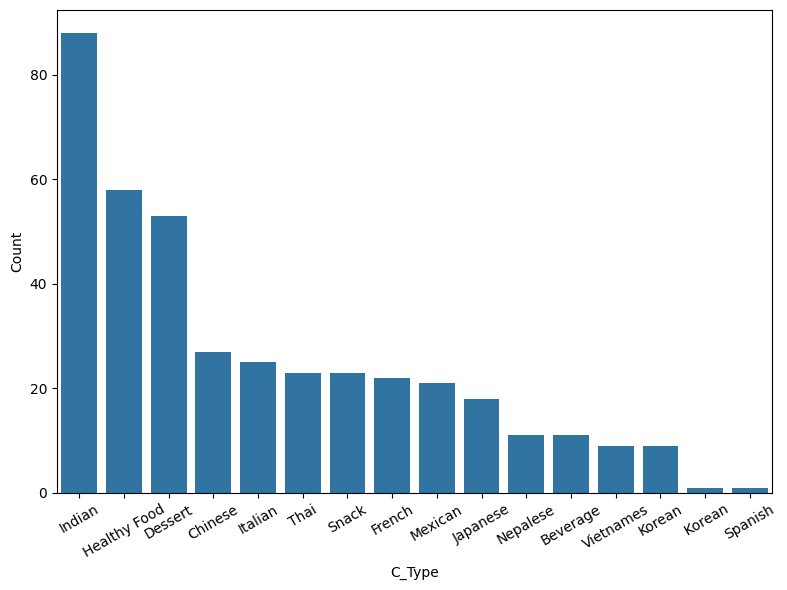

In [19]:
group_c_type = foods.groupby('C_Type')['C_Type'].agg('count').to_frame()
group_c_type = group_c_type.rename(columns={'C_Type': 'Count'})
group_c_type = group_c_type.sort_values(by='Count', ascending=False)
print(group_c_type.head(), '\n')

plt.figure(figsize=(8,6))

sns.barplot(x=group_c_type.index, y='Count', data=group_c_type)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("c_type.png", bbox_inches='tight')

Tipe masakan indian, healthy food, dan dessert merupakan top 3 untuk tipe masakan pada data. Selain itu, perhatikanlah terdapat nilai yang double yaitu Korean sehingga perlu ditinjau kembali mengapa demikian pada tahap Data Preparation.

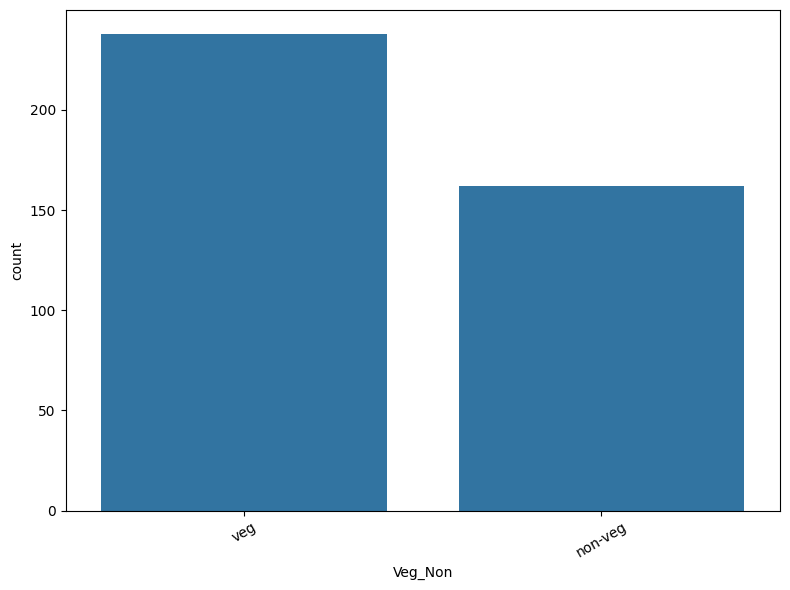

In [20]:
plt.figure(figsize=(8,6))

sns.countplot(x='Veg_Non', data=foods)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("veg_non.png", bbox_inches='tight')

Berdasarkan analisis terhadap data yang digunakan, terlihat bahwa mayoritas jenis makanan yang tercatat merupakan hidangan non-vegetarian. Masakan non-vegetarian ini umumnya terdiri dari bahan utama seperti daging sapi, ayam, ikan, serta produk-produk turunan hewani lainnya seperti telur dan susu. Keberagaman menu yang termasuk dalam kategori ini menunjukkan preferensi konsumen terhadap makanan yang kaya akan protein hewani dan cita rasa yang kuat. Selain itu, kehadiran masakan non-vegetarian dalam jumlah dominan juga mencerminkan tren kuliner global yang masih menjadikan produk hewani sebagai bagian penting dalam pola konsumsi sehari-hari. Meski demikian, tetap terdapat variasi hidangan sehat dalam data yang mengandung sayuran dan rempah-rempah, yang berfungsi menyeimbangkan kebutuhan nutrisi serta memberikan nilai gizi tambahan bagi konsumen.

**Ratings Datasets**

In [21]:
ratings.sample(5)

,User_ID,Food_ID,Rating
277,52.0,211.0,1.0
198,38.0,243.0,4.0
215,42.0,196.0,9.0
374,70.0,277.0,7.0
31,6.0,207.0,2.0


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


Perhatikan, terdapat perbedaan antara Non-Null Count (511) dengan entries (512) yang mengindikasikan adanya missing value pada masing-masing fitur tersebut. Selain itu, untuk tipe data tidak ada masalah tetapi demi konsistensi dengan tipe data Food_ID pada dataset sebelumnya foods adalah int maka pada dataset rating akan dilakukan konversi tipe data untuk fitur User_ID dan Food_ID dari float menjadi int pada tahap Data Preparation.

In [23]:
ratings.describe()

,User_ID,Food_ID,Rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


Dalam data, terdapat 511 baris data untuk fitur User_ID dan Food_ID, namun rentang nilai untuk masing-masing hanya mencakup 1 hingga 100 dan 1 hingga 309. Hal ini mengindikasikan bahwa beberapa pelanggan memberikan rating lebih dari sekali, begitu pula dengan makanan yang mendapatkan rating lebih dari sekali. Selain itu, fitur Rating menampilkan skala nilai dari 1 (terendah) hingga 10 (tertinggi).

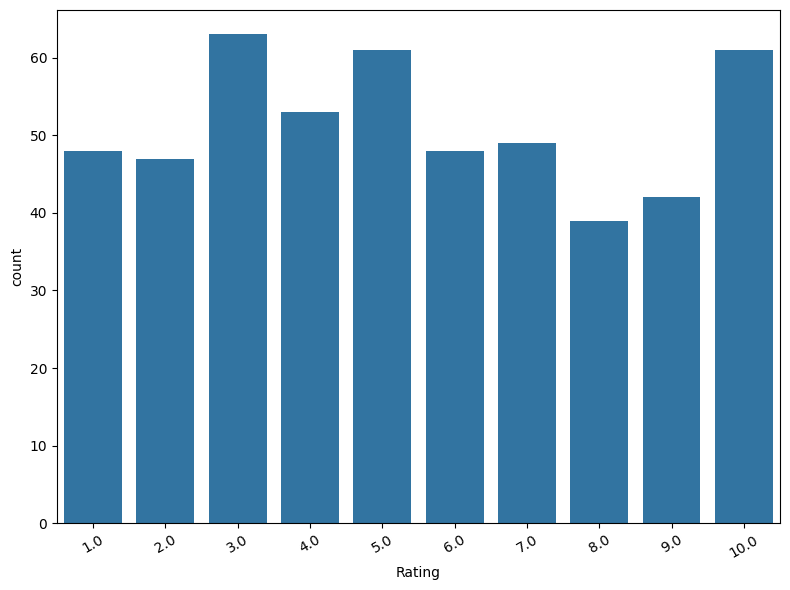

In [24]:
plt.figure(figsize=(8,6))

sns.countplot(x='Rating', data=ratings)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("ratings.png", bbox_inches='tight')

Persebaran rating yang diberikan oleh pengguna cukup merata untuk setiap nilai rating dalam rentang 1 hingga 10.

In [25]:
rate_up = ratings[ratings['Rating'] >= 8]
rate_up['Food_ID'].value_counts().head(5)

,count
Food_ID,
186.0,3
49.0,3
7.0,3
200.0,2
44.0,2


In [26]:
rate_down = ratings[ratings['Rating'] <= 3]
rate_down['Food_ID'].value_counts().head(5)

,count
Food_ID,
23.0,4
49.0,3
22.0,3
163.0,3
56.0,2


## Data Preparation

**Foods Datasets**

In [27]:
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe
144,145,saewoo bokumbop (shrimp fried rice),Japanese,veg,"cooked rice, shrimp (de-veined, onion, cooked ..."
174,175,chicken paella,Mexican,non-veg,"chicken, oil, salt and pepper, paprika powder,..."
252,253,double chocolate easter cookies,Dessert,veg,"Butter, Brown Sugar, Castor Sugar, Vanilla Ess..."
329,330,Frenched Green Beans,French,veg,"green beans, Olive Oil, black paper, vineger,"
86,87,roasted spring chicken with root veggies,Healthy Food,non-veg,"whole chicken, thyme, garlic, lemon, orange, s..."


In [28]:
foods['C_Type'].unique()

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       ' Korean', 'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

Perhatikan, bahwa benar terdapat nilai yang double pada nilai Korean dikarenakan adanya nilai C_Type yang memiliki whitespace diawal, sehingga akan dilakukan split untuk mengatasi hal tersebut.

In [29]:
foods['C_Type'] = foods['C_Type'].apply(lambda x: ' '.join(x.split()))
foods['C_Type'].unique()

array(['Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French',
       'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean',
       'Vietnames', 'Nepalese', 'Spanish'], dtype=object)

Berhasil, sudah tidak ada nilai yang double.

In [30]:
for feature in ['C_Type', 'Veg_Non', 'Describe']:
    foods[feature] = foods[feature].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x.lower()))

Untuk memproses teks dalam sebuah model, penting untuk membersihkan data teks dengan benar. Penggunaan re.sub(r'[^a-zA-Z]', ' ', x.lower()) digunakan untuk mengganti setiap karakter non-alphanumeric dengan spasi pada setiap elemen di kolom 'soup'. Dengan demikian, hanya karakter alphanumeric yang akan tetap ada setelah proses pembersihan ini.

In [31]:
foods.isna().any()

,0
Food_ID,False
Name,False
C_Type,False
Veg_Non,False
Describe,False


Perhatikan, tidak terdapat nilai yang hilang pada dataset foods.

In [32]:
foods.duplicated().any()

np.False_

Selain itu, pada dataset foods juga tidak mengandung data yang duplikat sehingga sudah siap untuk digunakan dalam tahap Modelling.

**Ratings Datasets**

In [33]:
ratings.sample(5)

,User_ID,Food_ID,Rating
326,62.0,9.0,7.0
182,36.0,45.0,6.0
164,32.0,94.0,10.0
216,42.0,284.0,4.0
154,31.0,188.0,10.0


In [34]:
ratings.isna().any()

,0
User_ID,True
Food_ID,True
Rating,True


Perhatikan, semua fitur pada dataset ratings mengandung nilai yang hilang.

In [35]:
ratings[ratings.isna().any(axis=1)]

,User_ID,Food_ID,Rating
511,NaN,NaN,NaN


Ternyata nilai yang hilang hanya terdapat pada satu baris data, oleh karena itu akan dilakukan dropping missing value untuk baris tersebut. Dengan melakukan dropping pada baris yang mengandung nilai yang hilang, kita dapat mempertahankan data yang utuh untuk analisis selanjutnya.

In [36]:
ratings.dropna(inplace=True)
ratings.isna().sum()

,0
User_ID,0
Food_ID,0
Rating,0


Data yang hilang terlah berhasil dilakukan dropping.

In [37]:
ratings.duplicated().any()

np.False_

Pada dataset ratings juga tidak memiliki data yang duplikat.

In [39]:
ratings['User_ID'] = ratings['User_ID'].astype(int)
ratings['Food_ID'] = ratings['Food_ID'].astype(int)

Tipe data pada kolom **User_ID** dan **Food_ID** telah berhasil dikonversi ke dalam format integer. Dengan konversi ini, kedua dataset kini telah siap digunakan dalam proses pemodelan sistem rekomendasi menggunakan pendekatan Content-Based Filtering maupun Collaborative Filtering.

## **Content Based Filtering**

Content Based Recommendation memanfaatkan informasi beberapa item / data untuk direkomendasikan kepada pengguna sebagai referensi yang terkait dengan informasi yang digunakan sebelumnya. Tujuan dari content based recommendation agar dapat memprediksi persamaan dari sejumlah informasi yang didapat dari pengguna.

In [38]:
features = ['C_Type', 'Veg_Non', 'Describe']
foods[features]

,C_Type,Veg_Non,Describe
0,healthy food,veg,white balsamic vinegar lemon juice lemon rin...
1,healthy food,non veg,olive oil chicken mince garlic minced oni...
2,snack,veg,almonds whole egg white curry leaves salt ...
3,healthy food,veg,vinegar honey sugar soy sauce salt garlic ...
4,dessert,veg,christmas dry fruits pre soaked orange zest...
...,...,...,...
395,korean,veg,cream cheese chopped kimchi scallions count...
396,mexican,non veg,poblano chiles bacon shrips red salsa garl...
397,french,non veg,broccoli bread crumbs anchovy fillets garli...
398,dessert,non veg,egg yolks lemon juice unsalted butter all pu...


In [40]:
foods['soup'] = foods[features].apply(lambda x: ' '.join(x), axis=1)
foods.sample(5)

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
163,164,green cucumber shots,healthy food,veg,english cucumbers garlic cloves smashed ro...,healthy food veg english cucumbers garlic clo...
22,23,dates and nuts ladoo,dessert,veg,dates pitted mixed nuts almonds cashews ...,dessert veg dates pitted mixed nuts almond...
248,249,vegetable manchurian,chinese,veg,mixed vegetables chopped fine or grated egg...,chinese veg mixed vegetables chopped fine or...
183,184,vegetable bruschetta,italian,veg,baguette grilled slices black olive tapenad...,italian veg baguette grilled slices black o...
68,69,banana and maple ice lollies,dessert,veg,banana greek yogurt heavy cream pure maple ...,dessert veg banana greek yogurt heavy cream ...


Dilakukan join untuk fitur-fitur yang akan digunakan sebagai preferensi pengguna dengan menggabungkan fitur Name, C_Type, dan Veg_Non.

**Count Vectorizer**

In [41]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(foods['soup'])

count.get_feature_names_out()

array(['aall', 'aamchoor', 'aata', ..., 'zested', 'zinfandel', 'zucchini'],
      dtype=object)

Perhatikan, untuk digunakan dalam tahap model akan digunakan CountVectorizer untuk mengubah data teks menjadi representasi angka dengan menghitung frekuensi kemunculan kata-kata di setiap dokumen. Bobotnya dihitung berdasarkan frekuensi kemunculan kata-kata tersebut di setiap dokumen.

In [42]:
count_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [43]:
pd.DataFrame(
    count_matrix.todense(),
    columns=count.get_feature_names_out(),
    index=foods['Name']
).sample(22, axis=1).sample(10, axis=0)

,coloring,soup,dough,shallot,pureed,italian,essence,surmai,onions,free,...,egg,caster,coastal,cake,cornflour,palm,traditional,pizza,greek,marshmallow
Name,,,,,,,,,,,,,,,,,,,,,
jerk chicken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sweet potato and quinoa bowl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chicken tikka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
malabar fish curry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eggplant and Beef Stir-Fry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lotus leaf wrapped fried rice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
balti meat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mushroom matar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Cosine Similarity**

In [44]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.37282186, 0.25253814, ..., 0.32084447, 0.20203051,
        0.39036003],
       [0.37282186, 1.        , 0.17574991, ..., 0.3588535 , 0.17574991,
        0.42447636],
       [0.25253814, 0.17574991, 1.        , ..., 0.12964074, 0.21428571,
        0.13801311],
       ...,
       [0.32084447, 0.3588535 , 0.12964074, ..., 1.        , 0.12964074,
        0.31311215],
       [0.20203051, 0.17574991, 0.21428571, ..., 0.12964074, 1.        ,
        0.06900656],
       [0.39036003, 0.42447636, 0.13801311, ..., 0.31311215, 0.06900656,
        1.        ]])


Dengan menggunakan cosine_similarity untuk menghitung kedekatan antar fitur dalam sistem rekomendasi, diperoleh skor kesamaan antar item atau fitur berdasarkan vektor fitur yang dihasilkan sebelumnya.

In [45]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=foods['Name'], columns=foods['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (400, 400)


Name,tricolour salad,chicken dragon,baked multigrain murukku,jerk chicken,quick chicken curry
Name,,,,,
Vietnamese Chicken Salad,0.327327,0.174964,0.041739,0.167183,0.108112
spanish artichoke and spinach dip,0.216506,0.231455,0.331295,0.073721,0.143019
plum cake,0.093659,0.100125,0.179144,0.047836,0.030934
californian breakfast benedict,0.093659,0.200250,0.107486,0.143509,0.309344
chicken shami kebab,0.346467,0.303046,0.192785,0.160872,0.374513
braised lamb shanks,0.081650,0.174574,0.062470,0.166812,0.134840
bread chana basket,0.144338,0.270031,0.220863,0.221163,0.572078
wok tossed asparagus in mild garlic sauce,0.192879,0.123718,0.088542,0.078811,0.101929
peri peri chicken satay,0.274986,0.419961,0.180334,0.240772,0.467099


Perlu diketahui bahwa matriks di atas merupakan hasil perhitungan dari nilai cosine similarity, yang menggambarkan tingkat kemiripan antar fitur — dalam hal ini, antar jenis makanan. Semakin tinggi nilai cosine similarity antara dua makanan, maka semakin besar pula kemiripan karakteristik di antara keduanya.

Nilai kesamaan ini mencerminkan sejauh mana dua item memiliki fitur atau atribut yang serupa berdasarkan data yang dianalisis. Dengan kata lain, makanan dengan skor similarity yang tinggi cenderung memiliki kesamaan dalam aspek-aspek seperti bahan, kategori, rasa, atau jenis masakan.



In [46]:
def food_recommendations(nama_makanan, similarity_data=cosine_sim_df,
                         items=foods[['Name', 'C_Type', 'Veg_Non']], k=5):

    index = similarity_data.loc[:,nama_makanan].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_makanan, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, telah didefinisikan function untuk melakukan recomendation system untuk food dengan representasi numerik menggunakan CountVectorizer dan perhitungan kedekatan fitur dengan Consine Similarity. Berikut akan dilakukan pengujian pada salah satu makanan.

In [47]:
foods.sample(1)

,Food_ID,Name,C_Type,Veg_Non,Describe,soup
299,300,black rice,healthy food,veg,riety of rice,healthy food veg riety of rice


Perhatikanlah, eggless coffee cupcakes masuk dalam kategori dessert dan veg. Tentu kita berharap rekomendasi yang diberikan adalah makanan dengan kategori yang mirip.

In [48]:
food_recommendations('eggless coffee cupcakes')

,Name,C_Type,Veg_Non
0,eggless vanilla cake,dessert,veg
1,chocolate fudge cookies,dessert,veg
2,microwave chocolate cake,dessert,veg
3,filter coffee,beverage,veg
4,double chocolate easter cookies,dessert,veg


Berhasil, kita memperoleh 5 rekomendasi dengan kategori 4 dessert dan 1 beverage serta termasuk veg.

## Collaborative Filtering

Collaborative Filtering memanfaatkan transaksi suatu produk / item yang didasarkan kepada perilaku / kebiasaan si pengguna. Tujuannya agar pengguna yang sama dan item yang serupa dapat disukai oleh pengguna sebagai rekomendasi pilihan. Collaborative Filtering umumnya terbagi atas 2 metode, yang pada proyek ini akan digunakan salah satunya yaitu User-Based Collaborative Filtering. Dalam user-based collaborative filtering, kesamaan atau similarity antar pengguna yang diukur berdasarkan riwayat interaksi mereka dengan item atau produk. Model mempelajari pola dari preferensi pengguna terhadap item berdasarkan kesamaan preferensi dengan pengguna lain.

In [49]:
num_user = ratings['User_ID'].nunique()
num_food = foods['Food_ID'].nunique()

min_rating = ratings['Rating'].min()
max_rating = ratings['Rating'].max()

Setelah mendefinsikan jumlah user, jumlah makanan, minimum rate, dan maximum rate. Sebelum melakukan split data untuk training dan testing akan dilakukan pengacakan dengan sample method.

In [50]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,User_ID,Food_ID,Rating
124,24,51,5.0
84,16,243,3.0
433,83,79,1.0
255,49,77,10.0
68,13,74,8.0
...,...,...,...
106,19,84,10.0
270,51,151,10.0
348,67,146,7.0
435,84,253,8.0


Data berhasil diacak (random) yang kemudia siap untuk displit menjadi variabel x dan y berikut.

In [51]:
x = ratings[['User_ID', 'Food_ID']].values
y = ratings['Rating'].apply(lambda x: round((x - min_rating) / (max_rating - min_rating), 2)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 24  51]
 [ 16 243]
 [ 83  79]
 ...
 [ 67 146]
 [ 84 253]
 [ 19   9]] [0.44 0.22 0.   1.   0.78 1.   1.   0.89 0.89 0.44 0.89 1.   0.22 0.44
 1.   0.44 0.11 0.44 0.67 0.11 0.56 0.78 0.67 0.56 0.22 1.   0.56 0.44
 0.78 0.11 0.78 0.11 0.67 0.33 1.   1.   1.   0.78 0.56 1.   0.33 0.56
 1.   0.33 0.44 0.44 0.44 0.33 0.44 0.22 0.78 0.   0.33 0.   0.67 0.11
 0.78 1.   0.   0.11 1.   0.33 0.44 1.   0.22 0.78 0.33 0.78 0.89 0.
 0.56 0.56 0.56 0.67 0.22 0.67 0.44 0.44 0.33 0.44 0.67 0.78 0.   0.44
 1.   0.33 0.33 0.67 0.44 1.   1.   0.   0.22 1.   0.44 0.22 0.22 0.67
 0.22 0.67 0.11 0.67 0.33 1.   0.44 0.33 0.56 1.   0.   0.89 0.11 1.
 0.44 1.   0.22 0.11 0.   0.22 0.78 0.33 0.89 0.   0.   0.67 0.33 1.
 0.11 0.22 0.33 0.78 0.44 0.56 1.   0.   0.22 0.22 1.   1.   0.89 0.33
 0.11 0.11 0.33 0.67 0.78 0.11 0.33 0.11 0.44 0.89 0.33 1.   0.   0.78
 0.44 0.11 0.89 0.44 0.56 0.22 0.78 0.44 0.33 0.56 0.   0.33 1.   0.33
 0.11 0.22 0.33 0.89 0.78 0.22 0.44 0.67 0.89 0.89 0.78 0.89 0.78 0.89
 0.22 0.78 

Data telah dibagi menjadi data pelatihan (train) dan data pengujian (test), di mana masing-masing telah dipisahkan antara fitur independen (X) dan target dependen (y). Tahapan selanjutnya adalah membangun sebuah class bernama RecommendationNet, yang dirancang untuk memprediksi skor kecocokan antara pengguna dan restoran. Model ini akan menggunakan teknik embedding sebagai pendekatan utama dalam membangun sistem rekomendasi yang efektif dan terpersonalisasi.



In [52]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_food, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_food = num_food
        self.embedding_size = embedding_size
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        self.food_embedding = tf.keras.layers.Embedding(
            num_food,
            embedding_size,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l1_l2(1e-6)
        )
        self.food_bias = tf.keras.layers.Embedding(num_food, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])

        dot_user_food = tf.tensordot(user_vector, food_vector, 2)
        x = dot_user_food + (user_bias + food_bias)

        return tf.nn.sigmoid(x)

Selanjutnya, lakukan proses compile terhadap model.

In [53]:
model = RecommenderNet(num_user+1, num_food+1, 100)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, SGD (Sthocastic Gradient Descend) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [54]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6981 - root_mean_squared_error: 0.3251 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3260
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6954 - root_mean_squared_error: 0.3157 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3260
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6943 - root_mean_squared_error: 0.3198 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3260
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6968 - root_mean_squared_error: 0.3173 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3260
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6898 - root_mean_squared_error: 0.3096 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3260
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6899 - root_mean_squared_error: 0.3248 - val_loss: 0.7067 - val_root_mean_squared_error: 0.3261
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

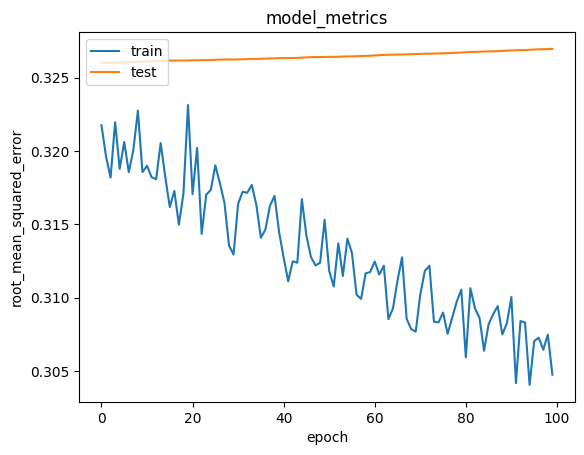

In [55]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.30 dan error pada data validasi sebesar 0.32. Nilai tersebut cukup bagus untuk sistem rekomendasi.

In [56]:
user_id = ratings['User_ID'].sample(1).iloc[0]
food_by_user = ratings[ratings['User_ID'] == user_id]

food_not_rate = foods[~foods['Food_ID'].isin(food_by_user['Food_ID'].values)]['Food_ID']
food_not_rate = list(
    set(food_not_rate)
    .intersection(set(foods['Food_ID']))
)

resto_not_visited = [[x] for x in food_not_rate]
user_resto_array = np.hstack(
    ([[user_id]] * len(resto_not_visited), resto_not_visited)
)

In [57]:
rate = model.predict(user_resto_array).flatten()

top_ratings_indices = rate.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_not_visited[x][0] for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Food with high ratings from user')
print('----' * 8)

top_resto_user = (
    food_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    ['Food_ID'].values
)

resto_df_rows = foods[foods['Food_ID'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(f'{row.Name}: {row.C_Type} ({row.Veg_Non})')

print('----' * 8)
print('Top 10 food recommendation')
print('----' * 8)

recommended_resto = foods[foods['Food_ID'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(f'{row.Name}: {row.C_Type} ({row.Veg_Non})')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Showing recommendations for users: 48
Food with high ratings from user
--------------------------------
chocolate nero cookies: dessert (veg)
cream of almond soup: healthy food (veg)
garlic and pinenut soup with burnt butter essence: french (veg)
chicken dong style: chinese (non veg)
zucchini methi pulao: indian (veg)
--------------------------------
Top 10 food recommendation
--------------------------------
tandoori fish tikka: indian (non veg)
black rice: healthy food (veg)
flattened rice / poha: indian (veg)
Kimchi and Miso Noodle Soup: korean (veg)
Spicy Korean Steak: korean (non veg)
French Spiced Bread: french (veg)
Quinoa Bowl and Berries: healthy food (veg)
Shawarma-Spiced Braised Leg of Lamb: indian (non veg)
Roast Pork Tenderloin with Carrot Romesco: korean (non veg)
Pho Chay Soup: vietnames (veg)


1. Sistem rekomendasi makanan ini telah berhasil menghasilkan daftar makanan yang beragam, baik dari segi jenis masakan (Indian, Korean, French, dll), kategori makanan (healthy, dessert, soup), dan preferensi diet (vegetarian dan non-vegetarian).

2. Mayoritas makanan yang disukai pengguna adalah vegetarian, yang menunjukkan bahwa sistem mengenali pola preferensi terhadap makanan yang lebih sehat atau berbasis nabati.

3. sistem tetap menyertakan beberapa opsi non-vegetarian berkualitas tinggi dalam daftar rekomendasi utama, yang mencerminkan pendekatan seimbang dan inklusif terhadap kebutuhan pengguna.

4. Rekomendasi yang dihasilkan cukup bervariasi dan kontekstual, cocok untuk diterapkan dalam platform layanan makanan, restoran digital, atau aplikasi diet yang mempertimbangkan preferensi personal.